In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


(360, 360)


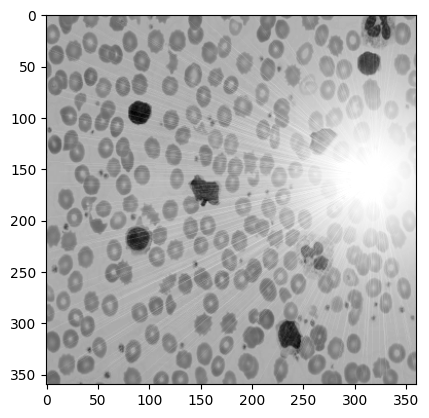

In [28]:
img = cv2.imread('/content/drive/MyDrive/colabp/Images/cell-bright.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [29]:
N = 18

dimh = np.int32(gImg.shape[0] / N)
dimw = np.int32(gImg.shape[1] / N)

dh_rest = np.int32(gImg.shape[0] % N)
dw_rest = np.int32(gImg.shape[1] % N)

meanImg = np.zeros((N,N))
outImg = np.zeros((gImg.shape[0],gImg.shape[1]))


In [30]:
def mean_function(img,dimh,dimw,h,w):
  count = 1
  sum = 0
  avg = 0
  for y in range(h,h+dimh):
    for x in range(w,w+dimw):
      sum += img[y,x]
      count += 1
  avg = np.int32(sum/count)
  return avg


In [31]:
for h in range(0,gImg.shape[0]-dh_rest,dimh):
  for w in range(0,gImg.shape[1]-dw_rest,dimw):
    meanImg[np.int32(h/dimh),np.int32(w/dimw)]=mean_function(gImg,dimh,dimw,h,w)

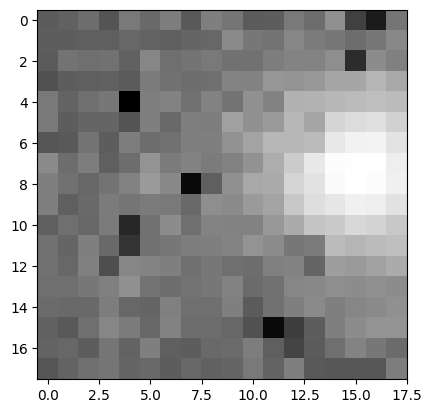

In [32]:
plt.imshow(meanImg, cmap='gray')


In [33]:
for h in range(0,gImg.shape[0]-dh_rest):
  for w in range(0,gImg.shape[1]-dw_rest):
    if(gImg[h,w] > meanImg[np.int32(h/dimh),np.int32(w/dimw)]):
      outImg[h,w] = 255
    else:
      outImg[h,w] = 0

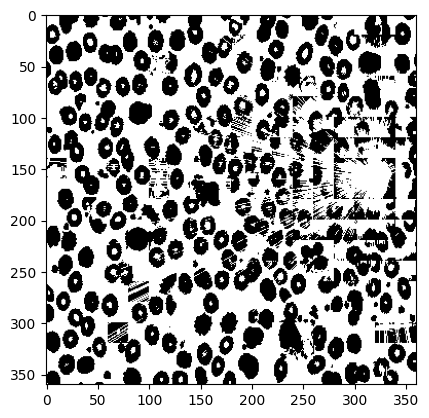

In [36]:
plt.imshow(outImg, cmap='gray')